In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def diag3(a: np.array, b: np.array, c: np.array, f: np.array):
    n = b.shape[0]
    
    b1 = np.zeros(n)+b[0]
    for i in range(1, n):
        b1[i] = b[i]-a[i]*c[i-1]/b1[i-1]
    f1 = np.zeros(n)+f[0]
    for i in range(1, n):
        f1[i] = f[i]-a[i]*f1[i-1]/b1[i-1]

    x = np.zeros(n)+f1[n-1]/b1[n-1]
    for i in range(n-2, -1, -1):
        x[i] = (f1[i]-c[i]*x[i+1])/b1[i]
    return x

In [22]:
A = np.array(((1, 2, 0), (5, 7, 1), (0, 22, 31)))
d1, d2, d3 = np.array((0, 5, 22)), np.array((1, 7, 31)), np.array((2, 1, 0))
b = np.array((42, 239, 25))
# Checking correctness of 3-diagonal equation solving
expected = np.linalg.lstsq(A, b, rcond=None)[0]
res = diag3(d1, d2, d3, b)
print("Expected: ", expected, "\nGot: ", res)

Expected:  [57.2 -7.6  6.2] 
Got:  [57.2 -7.6  6.2]


In [100]:
class spline:
    def __init__(self, x: np.array, f: np.array):
        self.a = f
        self.x = x
        n = x.shape[0]
        h = x[1:]-x[:-1]

        d1, d3 = h[:-1],h[1:]
        d2 = (d1+d3)*2

        res = np.zeros(n-2)
        for i in range(0, n-2):
            res[i] = 3*((f[i+2]-f[i+1])/h[i+1] - (f[i+1]-f[i])/h[i])
        
        self.c = np.insert(np.insert(diag3(d1, d2, d3, res), 0, 0), n-1, 0)
        self.b, self.d = np.zeros(n), np.zeros(n)
        for i in range(n-1):
            self.d[i] = (self.c[i+1]-self.c[i])/3/h[i]
            self.b[i] = (f[i+1]-f[i])/h[i]-(self.c[i]*2+self.c[i+1])*h[i]/3

    def coefs(self):
        return self.a, self.b, self.c, self.d
    
    def get(self, x):
        l, r = 0, self.x.shape[0]
        while r-l>1:
            m = (r+l)//2
            if self.x[m]>x:
                r = m
            else:
                l = m
        x = x-self.x[l]
        return self.a[l]+x*self.b[l]+x*x*self.c[l]+x*x*x*self.d[l]

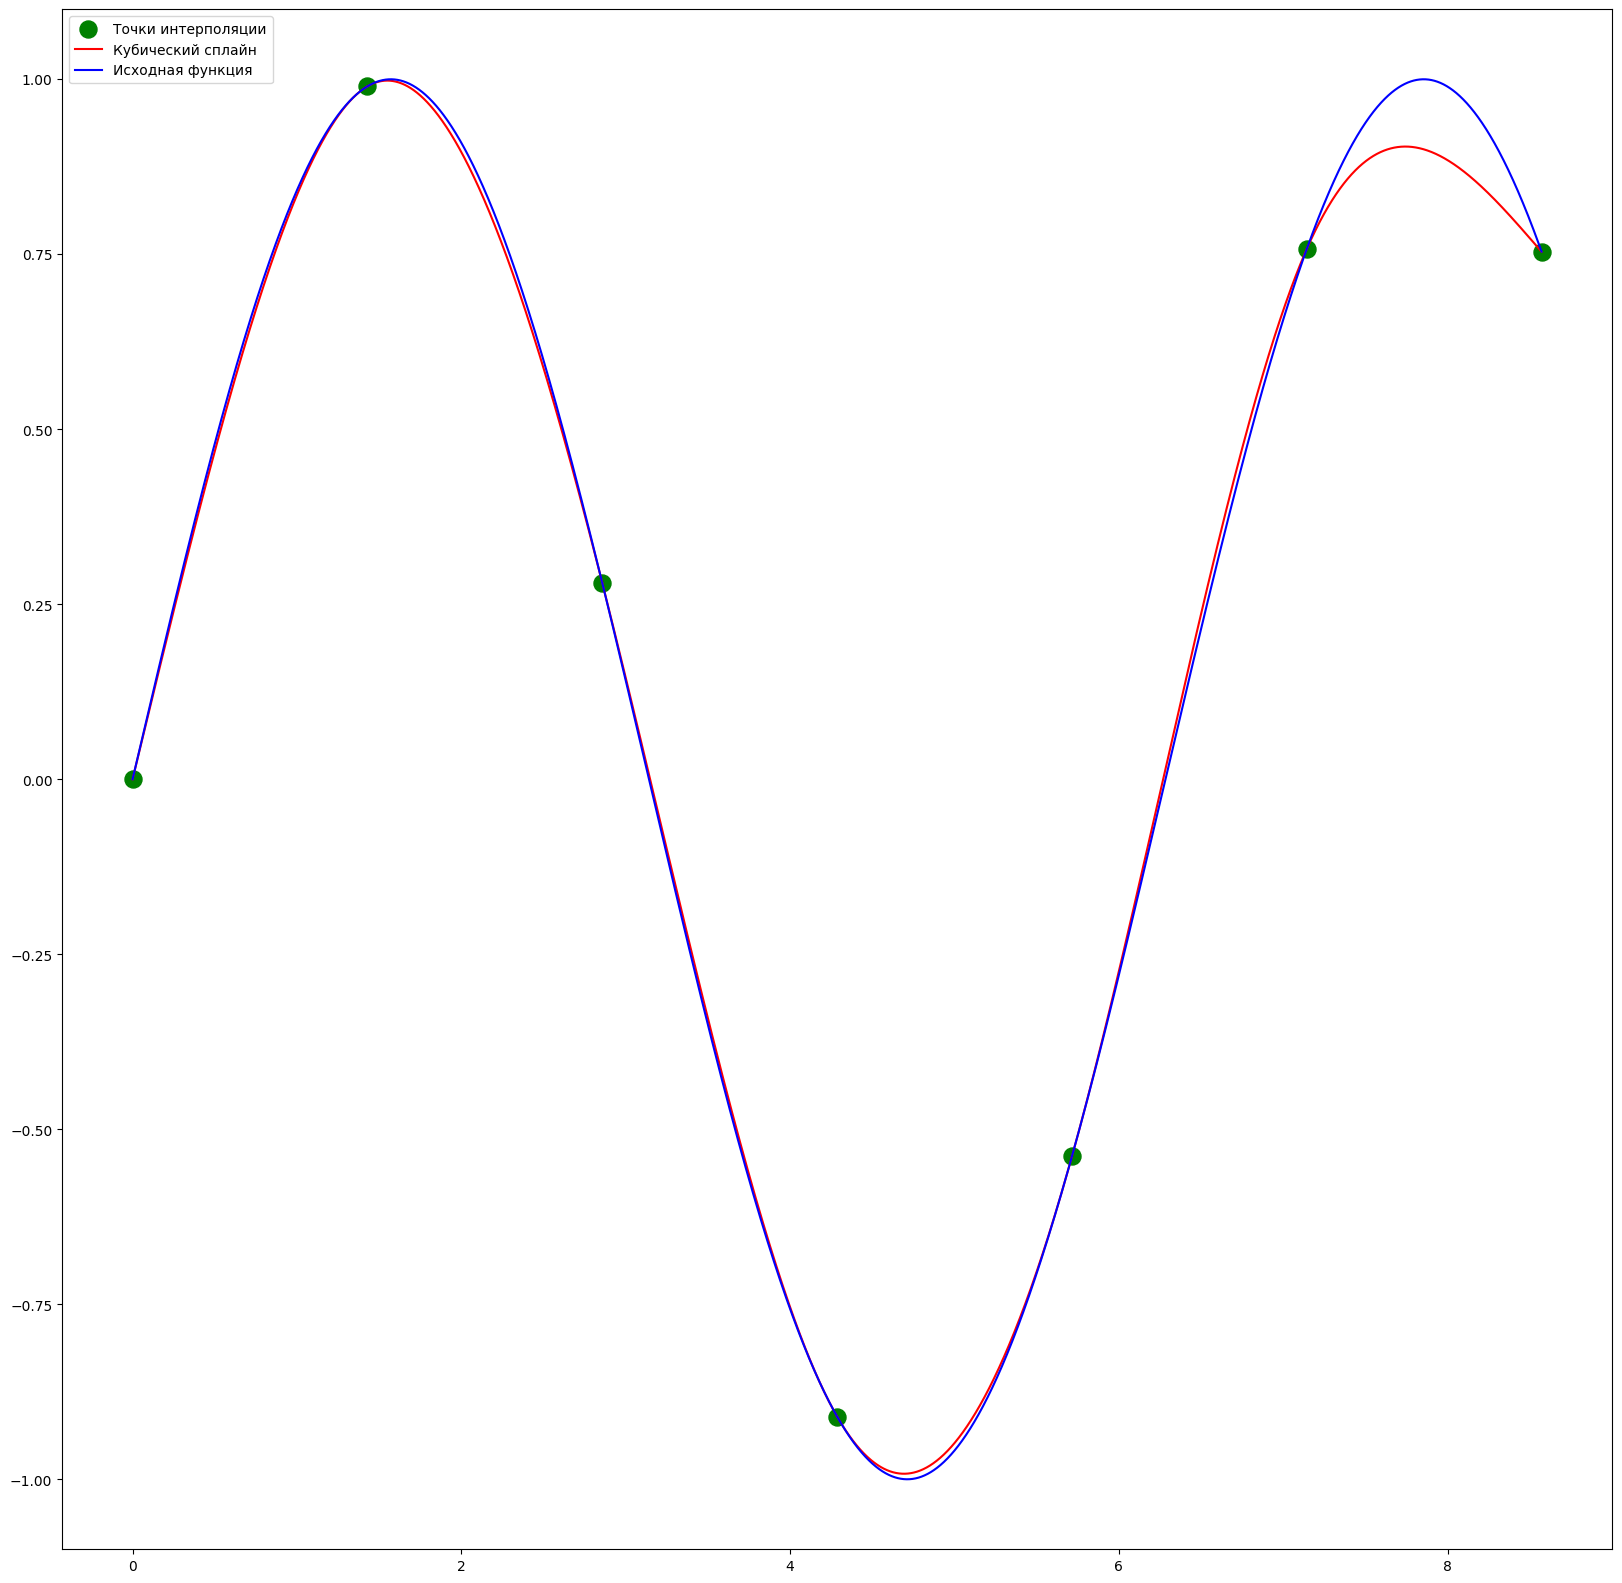

In [111]:
x_even = np.arange(0, 10, 10/7)
spl = spline(x_even, np.sin(x_even))
plt.figure(figsize=(20, 20))
plt.scatter(x_even, np.vectorize(spl.get)(x_even), c="green", s=150)
for i in range(len(x_even)-1):
    x_range = np.arange(x_even[i], x_even[i+1], 0.001) - x_even[i]
    plt.plot(x_range + x_even[i], x_range*x_range*x_range*spl.d[i]+x_range*x_range*spl.c[i]+x_range*spl.b[i]+spl.a[i], c="red")
    plt.plot(x_range + x_even[i], np.sin(x_range + x_even[i]), c="blue")
plt.legend(["Точки интерполяции", "Кубический сплайн", "Исходная функция"])
plt.show()

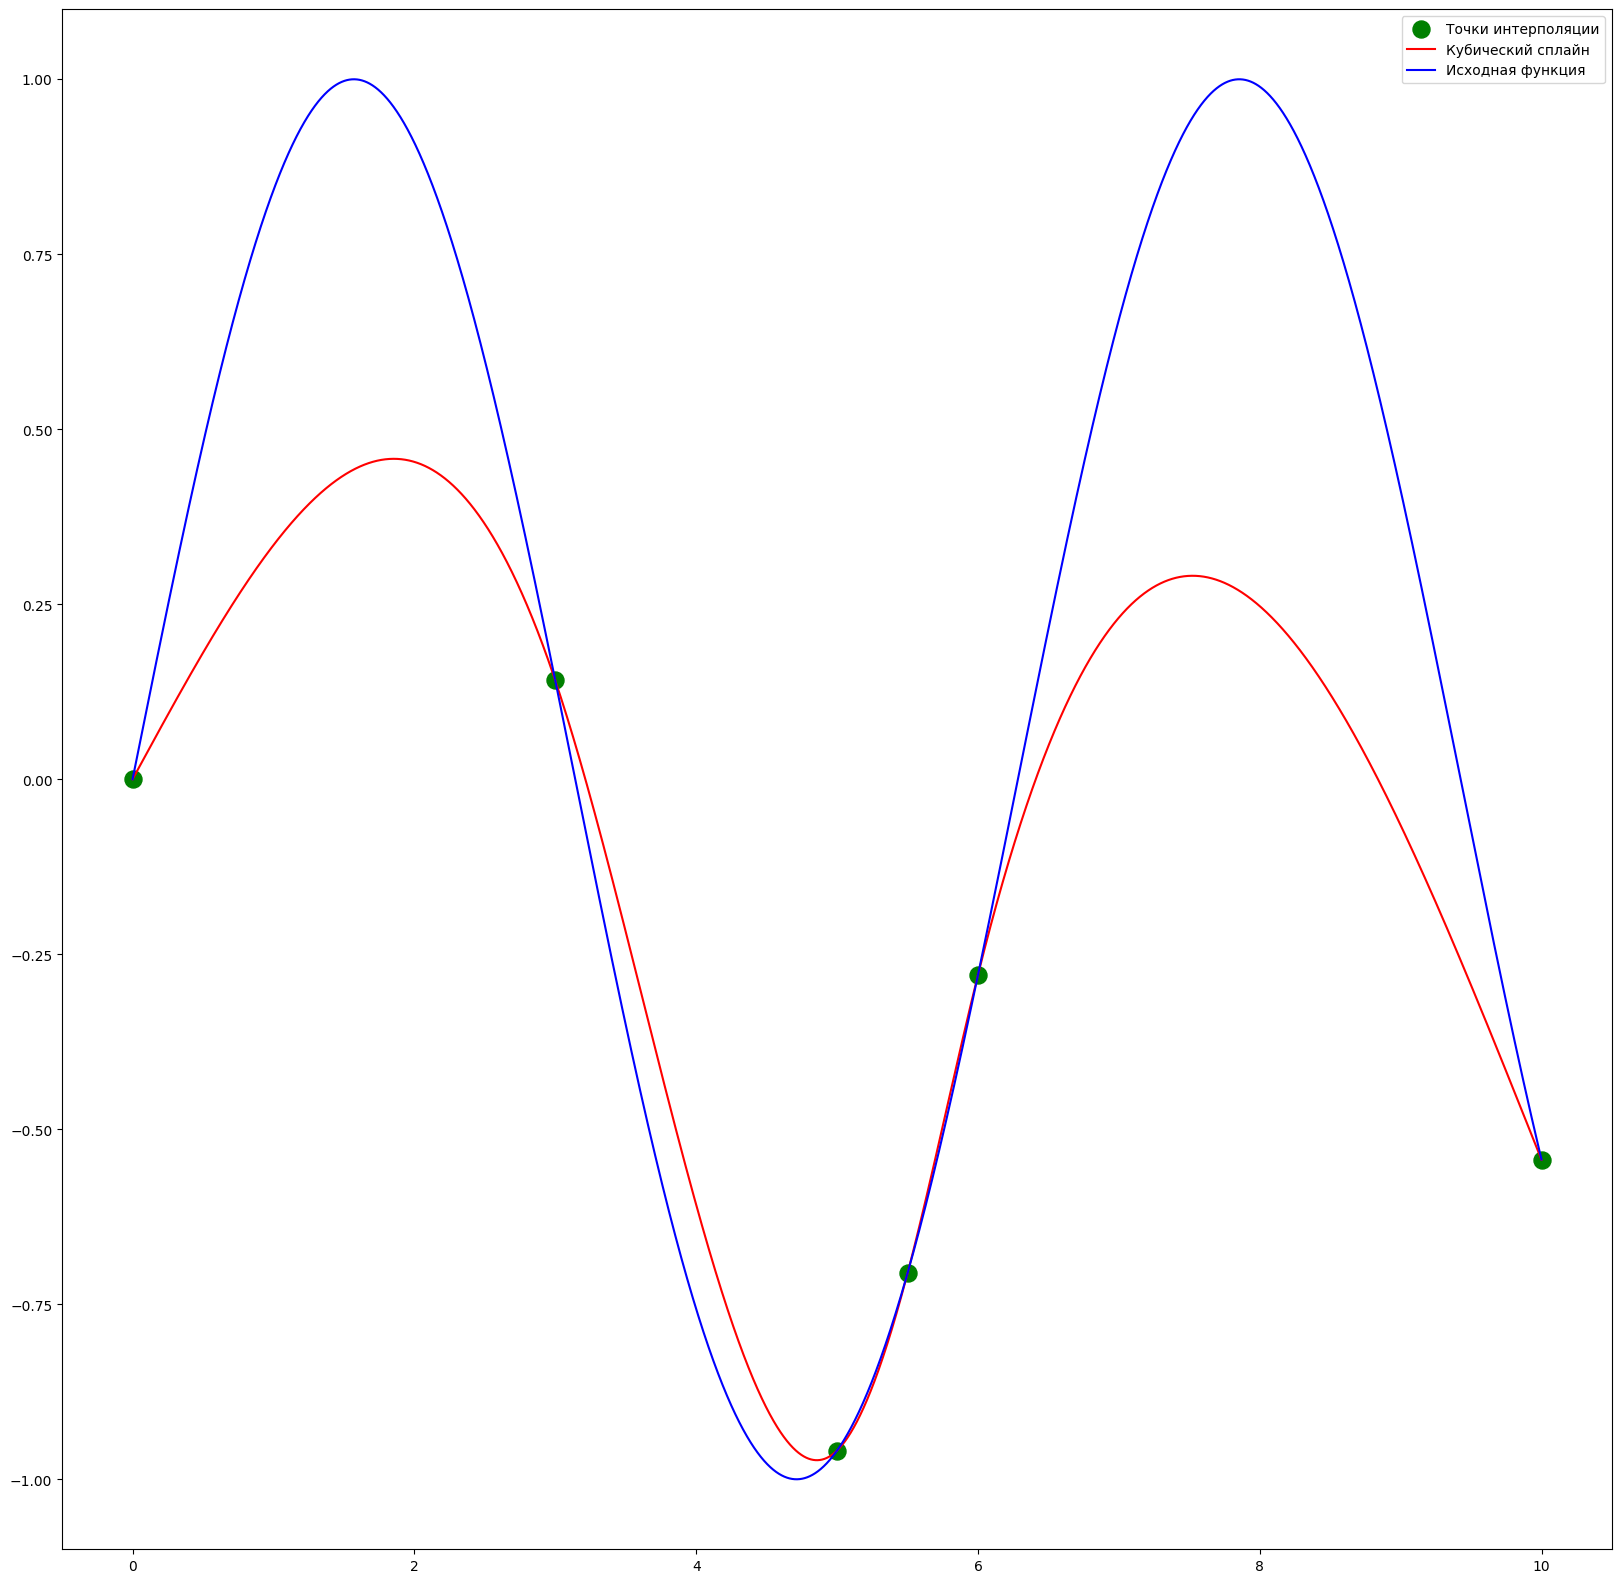

In [112]:
x_uneven = np.array([0, 3, 5, 5.5, 6, 10])
spl = spline(x_uneven, np.sin(x_uneven))
plt.figure(figsize=(20, 20))
plt.scatter(x_uneven, np.vectorize(spl.get)(x_uneven), c="green", s=150)
for i in range(len(x_uneven)-1):
    x_range = np.arange(x_uneven[i], x_uneven[i+1], 0.001) - x_uneven[i]
    plt.plot(x_range + x_uneven[i], x_range*x_range*x_range*spl.d[i]+x_range*x_range*spl.c[i]+x_range*spl.b[i]+spl.a[i], c="red")
    plt.plot(x_range + x_uneven[i], np.sin(x_range + x_uneven[i]), c="blue")
plt.legend(["Точки интерполяции", "Кубический сплайн", "Исходная функция"])
plt.show()